# 서울시 따릉이 자전거 이용 예측 모델 (Regression practice)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

# 데이터 불러오기

### 데이터 설명(출처: 데이콘)
#### train
* id: 고유 id
* hour: 시간
* temperature: 기온
* precipitation: 비가 오지 않았으면 0, 비가 오면 1
* windspeed: 풍속(평균)
* humidity: 습도
* visibility: 시정, 시계(특정 기상 상태에 따른 가시성을 의미)
* ozone: 오존
* pm10: 미세먼지(머리카락 굵기의 1/5 에서 1/7크기의 미세먼지)
* pm2.5: 미세먼지(머리카락 굵기의 1/20 에서 1/30 크기의 미세먼지)
* count: 시간에 따른 따릉이 대여 수

#### test
- count 제외하고 train과 동일

In [109]:
train= pd.read_csv('C:/Users/82102/Desktop/따릉이/train.csv')
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm25,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431


In [3]:
test= pd.read_csv('C:/Users/82102/Desktop/따릉이/test.csv')
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm25
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


# 데이터 전처리-1

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm25           1342 non-null   float64
 10  count                   1459 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 125.5 KB


## 결측값 대체

In [5]:
# 결측값 확인
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm25             117
count                       0
dtype: int64

In [6]:
# 결측값을 각 열 데이터의 평균값으로 대체
train = train.fillna({'hour_bef_temperature': train['hour_bef_temperature'].mean()})
train = train.dropna(subset = ['hour_bef_precipitation'])
train = train.fillna({'hour_bef_windspeed': train['hour_bef_windspeed'].mean()})
train = train.fillna({'hour_bef_humidity': train['hour_bef_humidity'].mean()})
train = train.fillna({'hour_bef_visibility': train['hour_bef_visibility'].mean()})
train = train.fillna({'hour_bef_ozone': train['hour_bef_ozone'].mean()})
train = train.fillna({'hour_bef_pm10': train['hour_bef_pm10'].mean()})
train = train.fillna({'hour_bef_pm25': train['hour_bef_pm25'].mean()})

In [7]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm25             0
count                     0
dtype: int64

# 회귀 진단 및 변수 제거

In [8]:
from statsmodels.formula.api import ols

In [9]:
fit = ols(formula = 'count~ hour+ hour_bef_temperature+ hour_bef_precipitation+ hour_bef_windspeed+ hour_bef_humidity+ hour_bef_visibility+ hour_bef_ozone+ hour_bef_pm10+ hour_bef_pm25', data = train).fit()

In [10]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.16e-281
Time:                        15:36:55   Log-Likelihood:                -7828.2
No. Observations:                1457   AIC:                         1.568e+04
Df Residuals:                    1447   BIC:                         1.573e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -36

+ 다중공선성 보임-> 정규화 필요
+ 유의수준 20% 하에서 hour_bef_visibility, hour_bef_pm2.5 변수 제거

In [110]:
train= train.drop('hour_bef_visibility',axis=1)
train= train.drop('id',axis=1)
train =train.drop('hour_bef_pm25', axis=1)
train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,count
0,20,16.3,1.0,1.5,89.0,0.027,76.0,49
1,13,20.1,0.0,1.4,48.0,0.042,73.0,159
2,6,13.9,0.0,0.7,79.0,0.033,32.0,26
3,23,8.1,0.0,2.7,54.0,0.040,75.0,57
4,18,29.5,0.0,4.8,7.0,0.057,27.0,431
...,...,...,...,...,...,...,...,...
1454,4,16.8,0.0,1.6,53.0,0.031,37.0,21
1455,3,10.8,0.0,3.8,45.0,0.039,34.0,20
1456,5,18.3,0.0,1.9,54.0,0.009,30.0,22
1457,21,20.7,0.0,3.7,37.0,0.082,71.0,216


In [57]:
fit1 = ols(formula = 'count~ hour+ hour_bef_temperature+ hour_bef_precipitation+ hour_bef_windspeed+ hour_bef_humidity+ hour_bef_ozone+ hour_bef_pm10', data = train).fit()

In [58]:
fitted = fit1.predict(train)

In [59]:
residual = train['count']- fitted

## 모형의 선형성

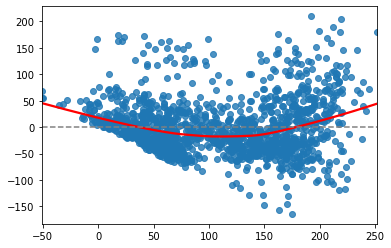

In [60]:
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], '--', color='grey')

* 예측값과 잔차 비교
* 빨간 실선이 점선에서 크게 벗어난다면 예측값에 따라 잔차가 크게 달라진다는 것으로 선형성이 없다는 뜻

-> 약간 만족..?

## 잔차의 정규성

In [61]:
import scipy.stats
from scipy.stats import probplot
sr = scipy.stats.zscore(residual)

In [62]:
sr = scipy.stats.zscore(residual)
sr

array([-0.29661117,  0.60152587, -0.60673461, ..., -1.17678845,
        0.35826757, -0.05215576])

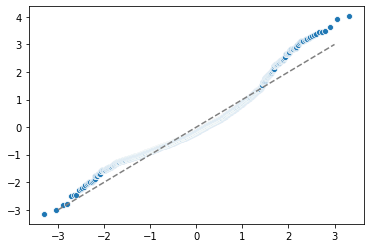

In [63]:
(x, y),_ = scipy.stats.probplot(sr)
sns.scatterplot(x,y)
plt.plot([-3,3], [-3,3], '--', color='grey')

* 잔차가 정규분포를 띄면 qq plot에서 점들이 점선을 따라 배치되어 있어야 함

In [64]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9459173083305359, pvalue=1.0744704572023034e-22)

* pvalue 값이 1.0744704572023034e-22 으로 유의수준 5%에서 잔차의 정규성 위배

## 잔차의 등분산성

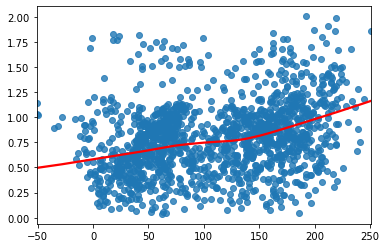

In [65]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess = True, line_kws = {'color': 'red'})

* 빨간색 실선이 수평선에 가까울수록 등분산성을 만족

-> 그닥 만족하지 않는듯..?

## 잔차의 독립성

* 위에서 구한 Durbin-Watson:1.983 를 이용해서 판단
* 보통 1.5~ 2.5 사이면 독립으로 판단하고 회귀모형이 적합하다는 것을 의미-> 독립

### 잔차의 독립성 제외 만족하지 않는 것으로 나타났지만 만족하는 것으로 가정하고 진행함

# 데이터 전처리-2

## 이상치 제거

In [112]:
train.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,count
count,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1383.000000,1369.000000,1459.000000
mean,11.493489,16.717433,0.031572,2.479034,52.231297,0.039149,57.168736,108.563400
std,6.922790,5.239150,0.174917,1.378265,20.370387,0.019509,31.771019,82.631733
min,0.000000,3.100000,0.000000,0.000000,7.000000,0.003000,9.000000,1.000000
25%,5.500000,12.800000,0.000000,1.400000,36.000000,0.025500,36.000000,37.000000
50%,11.000000,16.600000,0.000000,2.300000,51.000000,0.039000,51.000000,96.000000
75%,17.500000,20.100000,0.000000,3.400000,69.000000,0.052000,69.000000,150.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,0.125000,269.000000,431.000000


* cook's distance는 극단값을 나타내는 지표-> 이상치 제거

In [66]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [67]:
cd,_ = OLSInfluence(fit1).cooks_distance
cd.sort_values(ascending=False).head()

309     0.030960
325     0.013468
765     0.011718
1288    0.011301
803     0.011260
dtype: float64

* 309, 325, 765, 4, 803 행이 이상치

In [68]:
train_new = train.drop(index=309, axis=0)
train_new = train.drop(index=325, axis=0)
train_new = train.drop(index=765, axis=0)
train_new = train.drop(index=1288, axis=0)
train_new = train.drop(index=803, axis=0)

# 데이터 탐색 및 시각화

In [71]:
# 시간별 평균 따릉이 이용량
train_new.groupby(['hour'])['count'].mean()

hour
0      72.322034
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    263.830508
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

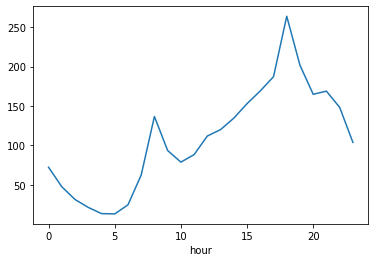

In [72]:
train_new.groupby(['hour'])['count'].mean().plot()

* 17~18시에 따릉이 이용이 가장 많았고, 5시에 가장 적었다.
* 따릉이 이용량이 급격하게 증가한 시간은 8-9시와 17-18시이다. -> 출퇴근 시간과 관련 추측

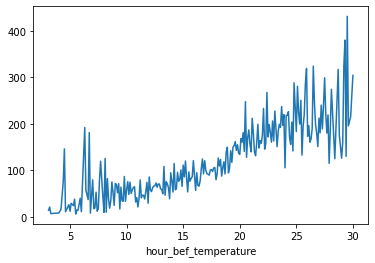

In [73]:
# 기온별 평균 따릉이 이용량
train_new.groupby(['hour_bef_temperature'])['count'].mean().plot()

* 기온이 높을수록 대체적으로 따릉이 이용량이 많음 -> 기온이 높을수록 걷기보다는 따릉이 선호

In [74]:
# 강수량별 평균 따릉이 이용량
train_new.groupby(['hour_bef_precipitation'])['count'].mean()

hour_bef_precipitation
0.0    110.907801
1.0     33.673913
Name: count, dtype: float64

* 비가 오지 않을 때 따릉이 이용량이 비가 올 때 보다 압도적으로 많음

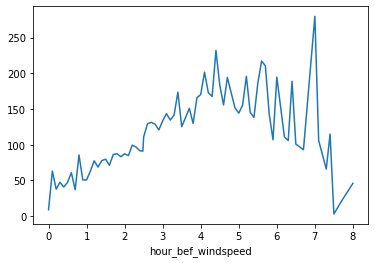

In [75]:
#  풍속별 평균 따릉이 이용량
train_new.groupby(['hour_bef_windspeed'])['count'].mean().plot()

* 풍속이 7일 때 따릉이 이용량이 가장 많음
* 대체적으로 풍속이 4-7일 때 따릉이 이용량 많음

### 참고: 풍속 정보
* 0 고요(calm)
* 1 실바람(light air)
* 2 남실바람(slight breeze)
* 3 산들바람(gentle breeze)
* 4 건들바람(moderate breeze)
* 5 흔들바람(fresh breeze)
* 6 된바람(strong breeze)
* 7 센바람(moderate gale)
* 8 큰 바람(fresh gale)
* 9 큰 센바람(strong gale)
* 10 노대바람(whole gale)
* 11 왕바람(storm)
* 12 싹쓸바람(hurricane)
* [네이버 지식백과] 풍속 [wind speed, 風速] (두산백과)



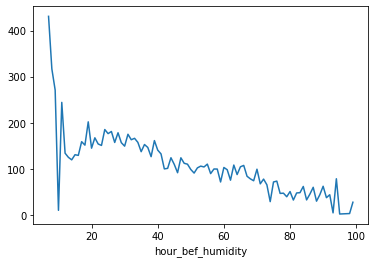

In [76]:
# 습도별 평균 따릉이 이용량
train_new.groupby(['hour_bef_humidity'])['count'].mean().plot()

* 습도가 낮을수록 따릉이 이용량 많음
* 습도가 10 미만일 때가 압도적으로 많음 (약 10일때는 왜 가장 적을까..?)

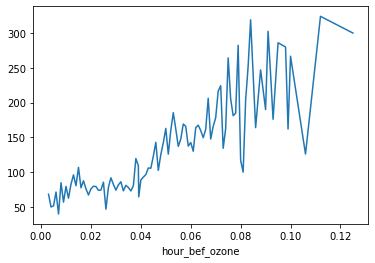

In [78]:
# 오존농도별 평균 따릉이 이용량
train_new.groupby(['hour_bef_ozone'])['count'].mean().plot()

* 오존 농도가 많을수록 대체적으로 따릉이 이용량 많음

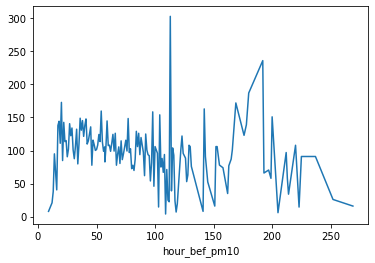

In [79]:
# pm10농도별 평균 따릉이 이용량
train_new.groupby(['hour_bef_pm10'])['count'].mean().plot()

* 미세먼지 pm10농도가 120이하 일 때 그래프가 촘촘한 것을 보아 따릉이 이용량이 많음

# 모델링

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
# count 를 타킷
y_target = train_new['count']
X_data = train_new.drop(['count'],axis = 1, inplace=False)

In [166]:
columns = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity','hour_bef_ozone','hour_bef_pm10']

In [184]:
X_test = test[columns]

## 회귀

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state=156)

In [193]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:3.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:3024.091, RMSE:54.992
Variance score: 0.561


## 릿지회귀

In [82]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [83]:
# alpha =10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [84]:
print ('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print ('5 folds의 개별 RMSE scores:', np.round(rmse_scores,3))
print ('5 folds의 평균 RMSEL {0:.3f}'. format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-2658.061 -3670.408 -2419.785 -2881.725 -2215.848]
5 folds의 개별 RMSE scores: [51.556 60.584 49.191 53.682 47.073]
5 folds의 평균 RMSEL 52.417


### 릿지의 alpha값을 변화시켜 가면서 RMSE와 회귀계수 살피기

In [85]:
# alpha 파라미터 정의
alphas = [0.07,0.1,1,10,100]

In [86]:
for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0.07일 때 5folds의 평균 RMSE: 52.190
alpha 0.1일 때 5folds의 평균 RMSE: 52.197
alpha 1일 때 5folds의 평균 RMSE: 52.315
alpha 10일 때 5folds의 평균 RMSE: 52.417
alpha 100일 때 5folds의 평균 RMSE: 52.842


* alpha가 0.07일 때 가장 좋은 평균 RMSE

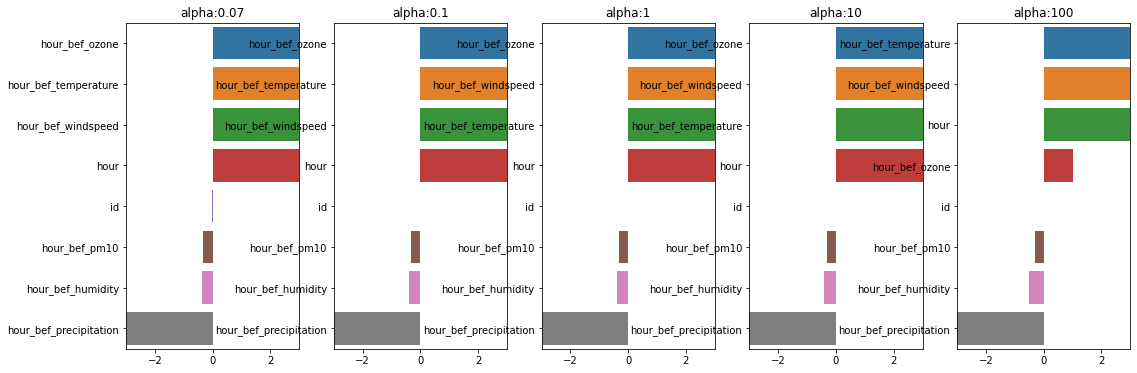

In [87]:
fig, axs = plt.subplots(figsize = (18, 6), nrows=1, ncols =5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,3)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [88]:
ridge_alphas = [0.07,0.1,1,10,100]
sort_column = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:1,alpha:10,alpha:100
hour_bef_ozone,261.516320,242.236965,75.469477,9.638380,1.029773
hour_bef_temperature,5.248678,5.273255,5.485880,5.570040,5.575178
hour_bef_windspeed,5.021809,5.107298,5.828537,5.912053,5.190388
hour,4.742291,4.745404,4.770796,4.764415,4.722306
id,-0.001507,-0.001474,-0.001173,-0.000926,-0.000522
hour_bef_pm10,-0.321017,-0.319751,-0.308749,-0.303843,-0.301724
hour_bef_humidity,-0.375615,-0.376857,-0.390371,-0.425794,-0.522750
hour_bef_precipitation,-56.154087,-56.131498,-55.056012,-45.125551,-15.997908


## 라쏘회귀

In [89]:
from sklearn.linear_model import Lasso, ElasticNet

In [90]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose =True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                            y_target_n, scoring = "neg_mean_squared_error", cv= 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
                
    return coeff_df

In [91]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 52.383
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 52.392
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 52.480
alpha 1일 때 5 폴드 세트의 평균 RMSE: 52.766
alpha 3일 때 5 폴드 세트의 평균 RMSE: 53.246


* alpha가 0.07일 때 가장 좋은 평균 RMSE

In [92]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=True)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
hour_bef_precipitation,-53.912733,-52.794363,-37.882572,-19.242432,-0.000000
hour_bef_humidity,-0.399535,-0.403478,-0.456052,-0.521773,-0.613500
hour_bef_pm10,-0.303693,-0.303610,-0.302502,-0.301117,-0.299001
id,-0.001029,-0.001014,-0.000815,-0.000567,-0.000322
hour_bef_ozone,0.000000,0.000000,0.000000,0.000000,0.000000
hour,4.783053,4.781913,4.766735,4.747787,4.774452
hour_bef_temperature,5.581084,5.580680,5.575309,5.568569,5.535998
hour_bef_windspeed,6.099128,6.057971,5.509102,4.822903,3.105882


* hour_bef_precipitation 와 hour_bef_ozone 는 0이 됨
* 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

## 엘라스틱넷 회귀

In [93]:
# l1_ratio값은 0.7으로 고정
elastic_alphas= [0.07,0.1,0.5,1.3]
coeff_elastic_df= get_linear_reg_eval('ElasticNet', params= elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 52.544
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 52.620
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 53.010
alpha 1.3일 때 5 폴드 세트의 평균 RMSE: 53.168


* alpha가 0.07일 때 가장 좋은 평균 RMSE

In [48]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
hour_bef_windspeed,5.840061,5.708574,4.805739,3.801052
hour_bef_temperature,5.650767,5.655272,5.647344,5.593612
hour,4.723722,4.716208,4.707884,4.736520
hour_bef_ozone,0.988263,0.020287,0.000000,0.000000
hour_bef_pm25,0.164066,0.169505,0.177451,0.157119
hour_bef_visibility,0.005293,0.005582,0.006429,0.006228
id,-0.000704,-0.000632,-0.000382,-0.000325
hour_bef_pm10,-0.293178,-0.291510,-0.285045,-0.282444
hour_bef_humidity,-0.387638,-0.399671,-0.456665,-0.500699
hour_bef_precipitation,-30.093641,-24.943850,-6.362355,-1.304930


* 릿지회귀의 alpha가 0.07일 때 RMSE 값이 가장 작아 릿지회귀 선택

# 데이터 변환

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [96]:
def get_scaled_data(method='None',p_degree=None, input_data=None):
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

## Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출

In [177]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1,1,10,100]

scale_methods=[(None,None),('Standard',None),('Standard',2),
              ('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],input_data=X_data)
    print('n## 변환유형 :{0},Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled, y_target_n=y_target,verbose=False,return_coeff=False)

n## 변환유형 :None,Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 52.197
alpha 1일 때 5 폴드 세트의 평균 RMSE: 52.315
alpha 10일 때 5 폴드 세트의 평균 RMSE: 52.417
alpha 100일 때 5 폴드 세트의 평균 RMSE: 52.842
n## 변환유형 :Standard,Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 52.179
alpha 1일 때 5 폴드 세트의 평균 RMSE: 52.178
alpha 10일 때 5 폴드 세트의 평균 RMSE: 52.172
alpha 100일 때 5 폴드 세트의 평균 RMSE: 52.218
n## 변환유형 :Standard,Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 49.252
alpha 1일 때 5 폴드 세트의 평균 RMSE: 49.239
alpha 10일 때 5 폴드 세트의 평균 RMSE: 49.121
alpha 100일 때 5 폴드 세트의 평균 RMSE: 48.898
n## 변환유형 :MinMax,Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 52.177
alpha 1일 때 5 폴드 세트의 평균 RMSE: 52.165
alpha 10일 때 5 폴드 세트의 평균 RMSE: 52.492
alpha 100일 때 5 폴드 세트의 평균 RMSE: 59.153
n## 변환유형 :MinMax,Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 48.742
alpha 1일 때 5 폴드 세트의 평균 RMSE: 48.730
alpha 10일 때 5 폴드 세트의 평균 RMSE: 50.071
alpha 100일 때 5 폴드 세트의 평균 RMSE: 53.135
n## 변환유형 :Log,Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 

* 변환유형 :MinMax,Polynomial Degree:2 일 때 가장 좋음 (최솟값/최댓값 정규화 + 2차 다항식)

# 모델 평가

In [172]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [194]:
model_dict = {'LR':LinearRegression()}

In [195]:
k_fold = KFold(n_splits=5, shuffle= True, random_state=10)

In [196]:
score = {}

for model_name in model_dict.keys():
    
    model = model_dict[model_name]
    
    score[model_name] = np.mean(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = k_fold))
    
    print(f'{model_name} 평가 완료')

LR 평가 완료


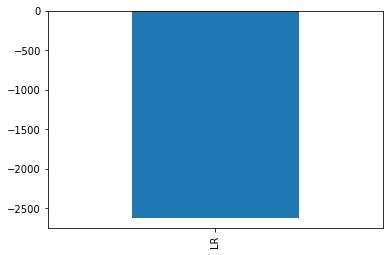

In [197]:
pd.Series(score).plot(kind = 'bar')